### What is Cache-Augmented Generation (CAG)?
CAG is a retrieval-free approach that bypasses the usual step of querying external knowledge sources at inference time. Instead, it preloads relevant documents into the LLM's extended context window, precomputes the model’s key‑value (KV) cache, and reuses this during inference—so the model can generate responses without additional retrieval steps 

In [1]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv() ## aloading all the environment variable
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


# LLM Initialization
llm=ChatGroq(model="openai/gpt-oss-120b")

In [2]:
### Cache variable
Model_Cache={}

In [3]:
import time

def cache_model(query):
    start_time=time.time()
    if Model_Cache.get(query):
        print("**CAche Hit**")
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        return Model_Cache.get(query)
    else:
        print("***CACHE MISS – EXECUTING MODEL***")
        start_time = time.time()
        response = llm.invoke(query)
        end_time = time.time()
        elapsed = end_time - start_time
        print(f"EXECUTION TIME: {elapsed:.2f} seconds")
        Model_Cache[query] = response
        return response


In [4]:
response=cache_model("hi")
response

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 0.68 seconds


AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "hi". We should greet back. Also follow policies. Simple.'}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 72, 'total_tokens': 116, 'completion_time': 0.087659463, 'prompt_time': 0.002468711, 'queue_time': 0.054266639, 'total_time': 0.090128174}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--39c83a2d-19a4-44e0-b149-d31adb8e2126-0', usage_metadata={'input_tokens': 72, 'output_tokens': 44, 'total_tokens': 116})

In [5]:
Model_Cache

{'hi': AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "hi". We should greet back. Also follow policies. Simple.'}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 72, 'total_tokens': 116, 'completion_time': 0.087659463, 'prompt_time': 0.002468711, 'queue_time': 0.054266639, 'total_time': 0.090128174}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--39c83a2d-19a4-44e0-b149-d31adb8e2126-0', usage_metadata={'input_tokens': 72, 'output_tokens': 44, 'total_tokens': 116})}

In [6]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "hi". We should greet back. Also follow policies. Simple.'}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 72, 'total_tokens': 116, 'completion_time': 0.087659463, 'prompt_time': 0.002468711, 'queue_time': 0.054266639, 'total_time': 0.090128174}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_82669fd91d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--39c83a2d-19a4-44e0-b149-d31adb8e2126-0', usage_metadata={'input_tokens': 72, 'output_tokens': 44, 'total_tokens': 116})

In [7]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 3.60 seconds
content='**LangGraph: A 500‑Word Overview of the Emerging Framework for Building LLM‑Powered Applications**\n\nLangGraph is an open‑source Python library that extends the capabilities of LangChain by providing a graph‑oriented abstraction for orchestrating large language model (LLM) workflows. While LangChain introduced the notion of “chains” – linear sequences of prompts, tools, and memory – LangGraph adds a richer, more flexible topology: nodes represent individual computational steps (LLM calls, API invocations, data transformations, etc.), and edges define the flow of information between them. This graph‑centric view makes it easier to model complex, branching, and iterative reasoning patterns that are common in real‑world AI products.\n\n### Core Concepts\n\n1. **Nodes** – The atomic units of execution. A node can be:\n   * **LLMNode** – wraps a prompt template, model, and optional output parsers.\n   * **ToolNode** –

In [8]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

**CAche Hit**
EXECUTION TIME: 0.00 seconds
content='**LangGraph: A 500‑Word Overview of the Emerging Framework for Building LLM‑Powered Applications**\n\nLangGraph is an open‑source Python library that extends the capabilities of LangChain by providing a graph‑oriented abstraction for orchestrating large language model (LLM) workflows. While LangChain introduced the notion of “chains” – linear sequences of prompts, tools, and memory – LangGraph adds a richer, more flexible topology: nodes represent individual computational steps (LLM calls, API invocations, data transformations, etc.), and edges define the flow of information between them. This graph‑centric view makes it easier to model complex, branching, and iterative reasoning patterns that are common in real‑world AI products.\n\n### Core Concepts\n\n1. **Nodes** – The atomic units of execution. A node can be:\n   * **LLMNode** – wraps a prompt template, model, and optional output parsers.\n   * **ToolNode** – calls an external fu

In [9]:
query="give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 3.89 seconds
content='**LangGraph: A 500‑Word Overview**\n\nLangGraph is an open‑source Python framework that extends the capabilities of the LangChain ecosystem by providing a structured, graph‑oriented way to design, orchestrate, and run complex multi‑step language‑model (LM) workflows. While LangChain introduced the idea of “chains”—linear sequences of prompts, tools, and memory—LangGraph adds a richer, non‑linear abstraction that mirrors real‑world decision trees, state machines, and conversational flows. This makes it especially suitable for applications that require branching logic, loops, conditional execution, or dynamic tool selection.\n\n---\n\n### Core Concepts\n\n1. **Nodes (Steps)**  \n   A node represents a single unit of work: a prompt to an LLM, a call to an external API, a database query, or any custom Python function. Nodes are defined as `Runnable` objects (the same abstraction LangChain uses), allowing them to be co

### Advanced CAG

In [12]:
from __future__ import annotations
from typing import TypedDict, List, Optional
import time

# ---- LangGraph / LangChain ----
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

from langchain_core.documents import Document
from langchain_openai import ChatOpenAI
from langchain.embeddings import HuggingFaceEmbeddings

# ---- FAISS vector stores ----
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [13]:
# ================= CONFIG =================
EMBED_MODEL = "sentence-transformers/all-MiniLM-L6-v2"  # 384-dim
VECTOR_DIM = 384

LLM_MODEL = "gpt-4o-mini"
LLM_TEMPERATURE = 0

RETRIEVE_TOP_K = 4
CACHE_TOP_K = 3

CACHE_DISTANCE_THRESHOLD = 0.45

# Optional TTL for cache entries (seconds). 0 = disabled.
CACHE_TTL_SEC = 0


In [14]:
# ================= STATE ==================
class RAGState(TypedDict):
    question: str
    normalized_question: str
    context_docs: List[Document]
    answer: Optional[str]
    citations: List[str]
    cache_hit: bool

In [15]:
# ============== GLOBALS ===================
from langchain_huggingface import HuggingFaceEmbeddings
EMBED = HuggingFaceEmbeddings(model_name=EMBED_MODEL)

c:\Users\ChitreshKaushik\Documents\RAG_UseCases\RAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# ----- QA CACHE (EMPTY, SAFE INIT) -----
qa_index = faiss.IndexFlatL2(VECTOR_DIM)  # distance; lower is better
QA_CACHE = FAISS(
    embedding_function=EMBED,
    index=qa_index,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)

In [17]:
QA_CACHE

In [18]:
# ----- RAG STORE (demo only) -----
RAG_STORE = FAISS.from_texts(
    texts=[
        "LangGraph lets you compose stateful LLM workflows as graphs.",
        "In LangGraph, nodes can be cached; node caching memoizes outputs keyed by inputs for a TTL.",
        "Retrieval-Augmented Generation (RAG) retrieves external context and injects it into prompts.",
        "Semantic caching reuses prior answers when new questions are semantically similar."
    ],
    embedding=EMBED,
)

In [19]:
LLM = llm

In [20]:
LLM


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000292E9152E40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000292E9153A10>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [21]:
# ================ NODES ===================
def normalize_query(state: RAGState) -> RAGState:
    q = (state["question"] or "").strip()
    state["normalized_question"] = q.lower()
    return state

def semantic_cache_lookup(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    state["cache_hit"] = False  # default

    if not q:
        return state

    # ✅ Guard: FAISS crashes if ntotal == 0 and you ask for k>0
    if getattr(QA_CACHE, "index", None) is None or QA_CACHE.index.ntotal == 0:
        return state

    # For FAISS L2 wrapper, this returns (Document, distance) with lower=better
    hits = QA_CACHE.similarity_search_with_score(q, k=CACHE_TOP_K)
    if not hits:
        return state

    best_doc, dist = hits[0]

    # Optional TTL
    if CACHE_TTL_SEC > 0:
        ts = best_doc.metadata.get("ts")
        if ts is None or (time.time() - float(ts)) > CACHE_TTL_SEC:
            return state

    # L2 distance gate (lower = more similar)
    if dist <= CACHE_DISTANCE_THRESHOLD:
        cached_answer = best_doc.metadata.get("answer")
        if cached_answer:
            state["answer"] = cached_answer
            state["citations"] = ["(cache)"]
            state["cache_hit"] = True

    return state

def respond_from_cache(state: RAGState) -> RAGState:
    return state

def retrieve(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    docs = RAG_STORE.similarity_search(q, k=RETRIEVE_TOP_K)
    state["context_docs"] = docs
    return state

def generate(state: RAGState) -> RAGState:
    q = state["question"]
    docs = state.get("context_docs", [])
    ctx = "\n\n".join([f"[doc-{i}] {d.page_content}" for i, d in enumerate(docs, start=1)])

    system = (
        "You are a precise RAG assistant. Use the context when helpful. "
        "Cite with [doc-i] markers if you use a fact from the context."
    )
    user = f"Question: {q}\n\nContext:\n{ctx}\n\nWrite a concise answer with citations."

    resp = LLM.invoke([{"role": "system", "content": system},
                       {"role": "user", "content": user}])
    state["answer"] = resp.content
    state["citations"] = [f"[doc-{i}]" for i in range(1, len(docs) + 1)]
    return state

def cache_write(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    a = state.get("answer")
    if not q or not a:
        return state

    QA_CACHE.add_texts(
        texts=[q],
        metadatas=[{
            "answer": a,
            "ts": time.time(),
        }]
    )
    return state

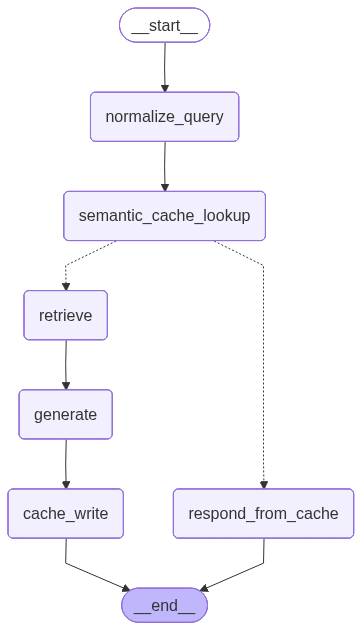

In [22]:
# ============== GRAPH WIRING ==============
graph = StateGraph(RAGState)

graph.add_node("normalize_query", normalize_query)
graph.add_node("semantic_cache_lookup", semantic_cache_lookup)
graph.add_node("respond_from_cache", respond_from_cache)
graph.add_node("retrieve", retrieve)
graph.add_node("generate", generate)
graph.add_node("cache_write", cache_write)

graph.set_entry_point("normalize_query")
graph.add_edge("normalize_query", "semantic_cache_lookup")

def _branch(state: RAGState) -> str:
    return "respond_from_cache" if state.get("cache_hit") else "retrieve"

graph.add_conditional_edges(
    "semantic_cache_lookup",
    _branch,
    {
        "respond_from_cache": "respond_from_cache",
        "retrieve": "retrieve"
    }
)

graph.add_edge("respond_from_cache", END)
graph.add_edge("retrieve", "generate")
graph.add_edge("generate", "cache_write")
graph.add_edge("cache_write", END)

memory = MemorySaver()
app = graph.compile(checkpointer=memory)
app

In [23]:
# ================= DEMO ===================
if __name__ == "__main__":
    thread_cfg = {"configurable": {"thread_id": "demo-user-1"}}

    q1 = "What is LangGraph ?"
    out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
    print("Answer:", out1["answer"])
    print("Citations:", out1.get("citations"))
    print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework for building stateful LLM workflows as graph‑structured pipelines, letting you compose and orchestrate language‑model operations as interconnected nodes [doc‑2]. It also supports features such as node‑level caching, where a node’s output is memoized (keyed by its inputs) for a configurable time‑to‑live [doc‑1].
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [24]:
q1 = "Explain about LangGraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework for building stateful LLM workflows as graph‑structured pipelines, letting you compose and orchestrate language‑model operations as interconnected nodes [doc‑2]. It also supports features such as node‑level caching, where a node’s output is memoized (keyed by its inputs) for a configurable time‑to‑live [doc‑1].
Citations: ['(cache)']
Cache hit?: True


In [25]:
q1 = "Explain about LangGraph agents ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are modular components that let you build **stateful LLM workflows as directed graphs**. Each node in the graph represents a step—such as prompting an LLM, calling a tool, or performing retrieval—and the agent’s state is passed along edges, enabling complex, multi‑turn interactions [doc-2].  

Key features include:

* **Node caching** – the output of a node can be memoized based on its inputs for a configurable time‑to‑live, so repeated calls with the same data are served instantly without re‑executing the LLM or tool [doc-1].  
* **RAG integration** – agents can incorporate Retrieval‑Augmented Generation, pulling external documents and injecting them into prompts to ground the model’s responses [doc-3].  
* **Semantic caching** – beyond exact matches, LangGraph can reuse prior answers when new queries are semantically similar, further speeding up the workflow [doc-4].

Together, these capabilities let developers compose flexible, efficient, and context‑aware L

In [26]:
q1 = "Explain about agents in Langgraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph agents are modular components that let you build **stateful LLM workflows as directed graphs**. Each node in the graph represents a step—such as prompting an LLM, calling a tool, or performing retrieval—and the agent’s state is passed along edges, enabling complex, multi‑turn interactions [doc-2].  

Key features include:

* **Node caching** – the output of a node can be memoized based on its inputs for a configurable time‑to‑live, so repeated calls with the same data are served instantly without re‑executing the LLM or tool [doc-1].  
* **RAG integration** – agents can incorporate Retrieval‑Augmented Generation, pulling external documents and injecting them into prompts to ground the model’s responses [doc-3].  
* **Semantic caching** – beyond exact matches, LangGraph can reuse prior answers when new queries are semantically similar, further speeding up the workflow [doc-4].

Together, these capabilities let developers compose flexible, efficient, and context‑aware L